Herman Steurs

Dataset: https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption

Lineaire regressie 

Oefening: lineaire regressie uitvoeren op de dataset.
Importeren modules
Data bekijken met Sweetviz
Data bewerken

LabelEncoder toegepast om de score van de Kaggle gebruiker te verkrijgen
Correlatie van de kolommen bekeken
Skewness van de target variabele verbetert
StandardScaler toegepast
Feature enginering 
Lasso
Ridge
Outliers bekijken 


## Inlezen van de data

In [676]:
# Importeren van modules:

import pandas as pd
import numpy as np

# Inlezen van de dataset

auto = pd.read_csv("data/FuelConsumption_dataset.csv")

## Data en structuur bekijken 

In [677]:
# Lege cellen en dataypes bekijken
auto.info()

# Samenvattingen van de numerische kolommen (minimum en maximum waarden,... )
auto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [678]:
# Overzicht van de eerste 5 rijen. ()is standaard 5 rijen
auto.head()


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [679]:
# Inlezen data in Sweetviz

# import sweetviz as sv

# auto = pd.read_csv("data/FuelConsumption_dataset.csv")

# # hack voor bug in de uitvoering
# if not hasattr(np, 'VisibleDeprecationWarning'):
#      np.VisibleDeprecationWarning = DeprecationWarning

# report = sv.analyze(auto)

# # Output het rapport als een HTML-bestand, dit opent ook automatisch in je webbrowser
# report.show_html('FuelCondumption.html')

## Data cleaning

In [680]:
# Print de kolomnamen 

print(auto.columns)

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')


In [681]:
# Aanpassen van de kolomnaam 'COEMISSIONS ' naar 'COEMISSIONS'

auto.rename(columns={'COEMISSIONS ': 'COEMISSIONS'}, inplace=True)

# Verwijderen van kolom 'Year' - overbodige kolom

auto.drop('Year', axis=1, inplace=True)  

# Print de kolomnamen 

print(auto.columns)

Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS'],
      dtype='object')


## Reproductie resultaat Kaggle

Kaggle user heeft enkel alle categorische waarden omgezet in numerische waarden en een lineaire regressie toegepast en toont een modelscore van 98,57%

In [682]:

auto_kaggle = auto.copy()

# Importeer LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Maak een LabelEncoder aan
le = LabelEncoder()

# Selecteer de categorische kolommen
obj_cols = auto_kaggle.select_dtypes('object').columns

# Pas LabelEncoder toe op elke categorische kolom
for col in obj_cols:
    auto_kaggle[col] = le.fit_transform(auto_kaggle[col])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Features selecteren 
X = auto_kaggle.drop(['COEMISSIONS'],axis=1)
y = auto_kaggle['COEMISSIONS']

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen
y_pred = model.predict(X_test)

# Printen score
print(f'Model score is {model.score(X_test, y_test)*100:.2f}% zoals beschreven in de Kaggle Notebook' )

Model score is 98.57% zoals beschreven in de Kaggle Notebook


Model scores Kaggle methode

In [683]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score: {train_score*100:.2f}%')
print(f'Test score: {test_score*100:.2f}%')

Train score: 96.60%
Test score: 98.57%


In [684]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=6, scoring='r2')
print(f'Kruisvalidatie scores: {scores}')
print(f'Gemiddelde R²-score: {scores.mean()*100:.2f}%')

Kruisvalidatie scores: [0.9738215  0.90612424 0.98488673 0.98251414 0.94327516 0.92774743]
Gemiddelde R²-score: 95.31%


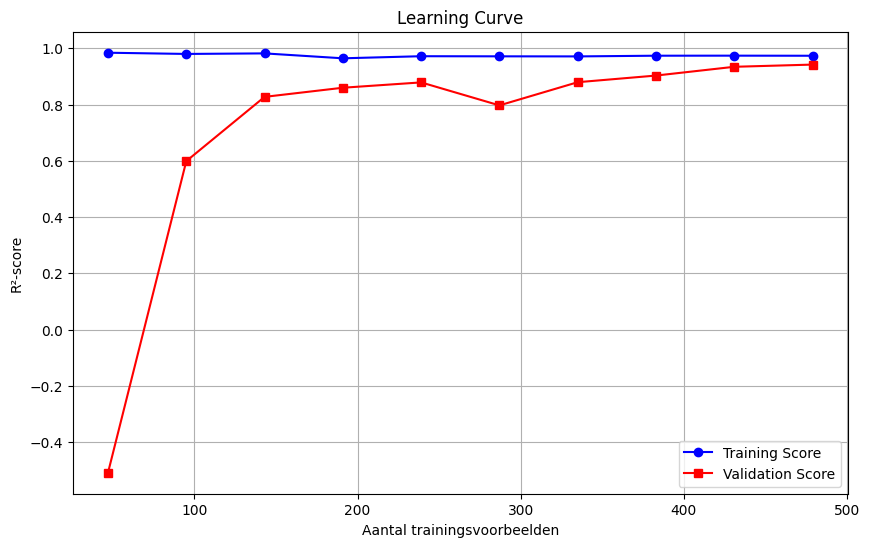

In [685]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definieer de train-groottes die we willen testen
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=4, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Bereken gemiddelde en standaardafwijking van de scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot de learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')


plt.plot(train_sizes, test_mean, label="Validation Score", color="red", marker='s')


plt.xlabel("Aantal trainingsvoorbeelden")
plt.ylabel("R²-score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


## Model verbeteren ?  

### Verwijderen dubbele lijnen

In [686]:
print(f'The dataset has {auto.duplicated().sum()} duplicate values.')


The dataset has 1 duplicate values.


In [687]:
duplicates = auto[auto.duplicated()]
print(duplicates)

           MAKE                    MODEL VEHICLE CLASS  ENGINE SIZE  \
378  LAND ROVER  DISCOVERY SERIES II 4X4           SUV          4.0   

     CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS  
378          8           A4    Z              19.6          403  


In [688]:
auto = auto.drop_duplicates()

In [689]:
auto.shape

(638, 9)

### Omzetten categorische naar numerische waarden

In [690]:
# Omzetten van alle categorische naar numerische waarden

# Maak een LabelEncoder aan
le = LabelEncoder()

# Selecteer de categorische kolommen
obj_cols = auto.select_dtypes('object').columns

# Pas LabelEncoder toe op elke categorische kolom
for col in obj_cols:
    auto[col] = le.fit_transform(auto[col])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Features selecteren 
X = auto.drop(['COEMISSIONS'],axis=1)
y = auto['COEMISSIONS']

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen
y_pred = model.predict(X_test)

# model score
score_num = round(model.score(X_test, y_test)*100,2)
  
# Printen score
print(f'Model score is nu {score_num}%' " vs 98,57% in de kaggle notebook door de dubbele lijn weg te halen." )

Model score is nu 97.56% vs 98,57% in de kaggle notebook door de dubbele lijn weg te halen.


### Skewness target variabele verbeteren

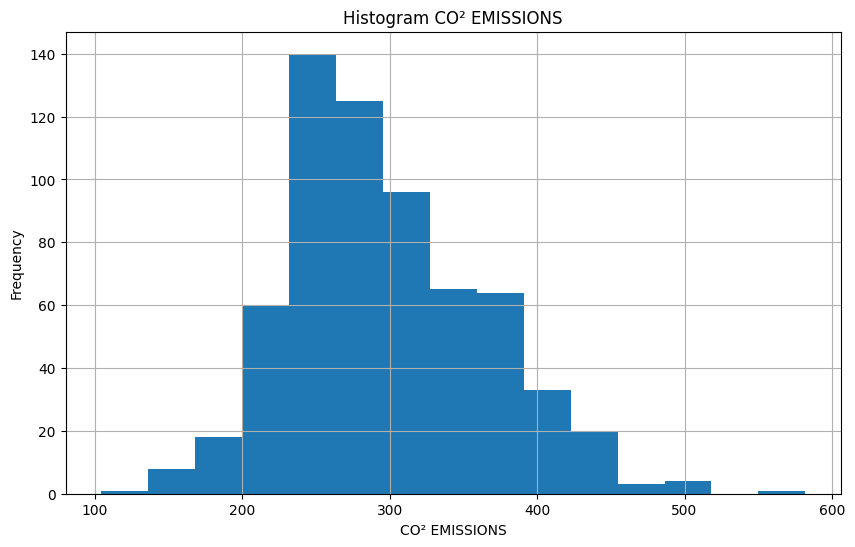

In [691]:
import matplotlib.pyplot as plt

auto['COEMISSIONS'].hist(bins = 15, figsize = (10, 6))
plt.xlabel('CO² EMISSIONS')
plt.ylabel('Frequency')
plt.title('Histogram CO² EMISSIONS')
plt.grid(True)
plt.show()

In [692]:
from scipy.stats import boxcox,skew

# Pas box-cox transformatie toe op de categorische kolommen
auto['COEMISSIONS_boxcox'], _ = boxcox(auto['COEMISSIONS'] + 1)  # +1 om nulwaarden te vermijden

# Bereken skewness na box-cox transformatie
skewness_boxcox = skew(auto['COEMISSIONS_boxcox'])
print(f'Skewness na Box-Cox transformatie: {skewness_boxcox}')

Skewness na Box-Cox transformatie: 0.005385850443656547


In [693]:
# Verwijderen van de 'COEMISSIONS' kolom.

auto.drop('COEMISSIONS', axis=1, inplace=True) 

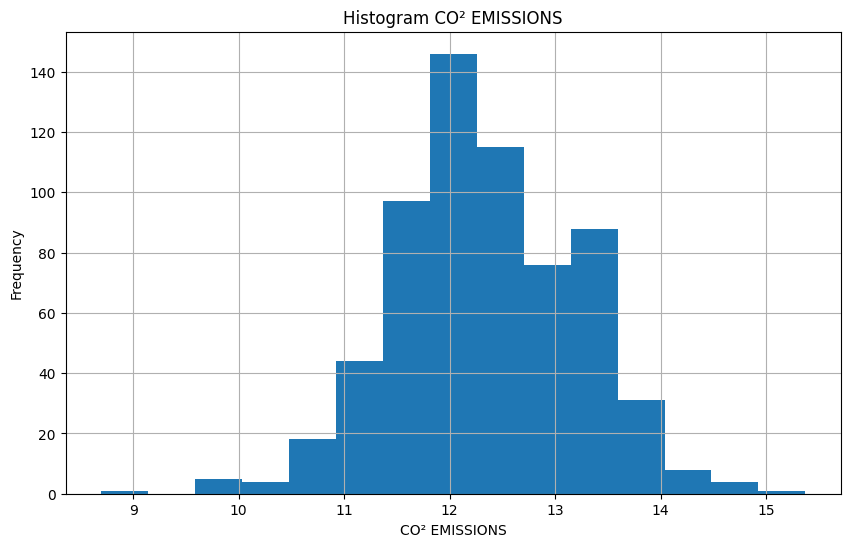

In [694]:
# nieuw histogram na box-cox transformatie
# 
auto['COEMISSIONS_boxcox'].hist(bins = 15, figsize = (10, 6))
plt.xlabel('CO² EMISSIONS')
plt.ylabel('Frequency')
plt.title('Histogram CO² EMISSIONS')
plt.grid(True)
plt.show()

## Correlatie van numerische variablelen

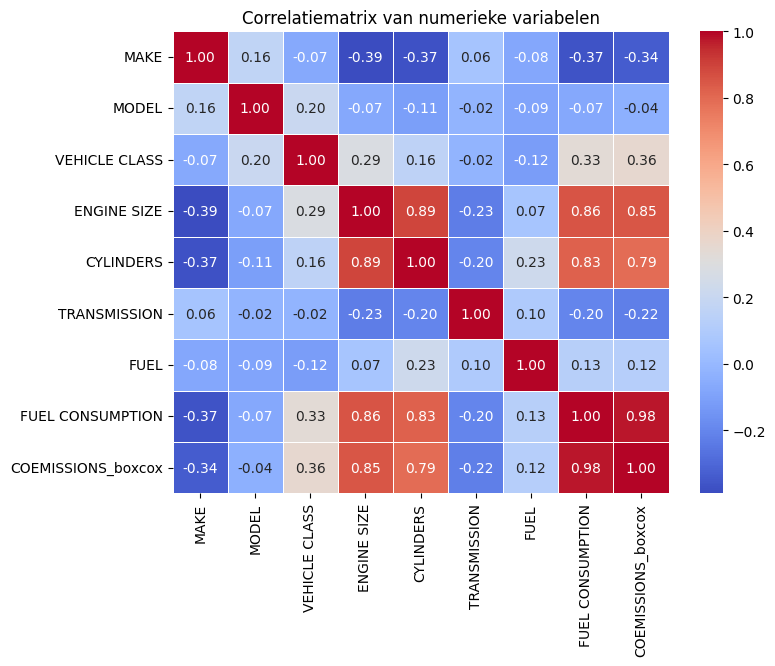

In [695]:
import seaborn as sns

# Correlatie berekenen van de numerische kolommen

correlatie_matrix =auto.corr()

# plot maken van de matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlatie_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.7)
plt.title("Correlatiematrix van numerieke variabelen")
plt.show()

## lineaire regressie met verbeterde skewness van de target variabele

In [696]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = auto.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto['COEMISSIONS_boxcox']

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen
y_pred = model.predict(X_test)

score_skew = round(model.score(X_test, y_test)*100,2)
print(f'Model score na het aanpassen van de skewness op de target waarde is {score_skew}% vs {score_num}% zonder aanpassen skewness')


train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'{train_score*100:.2f}%') 
print(f'{test_score*100:.2f}%')



Model score na het aanpassen van de skewness op de target waarde is 97.03% vs 97.56% zonder aanpassen skewness
95.75%
97.03%


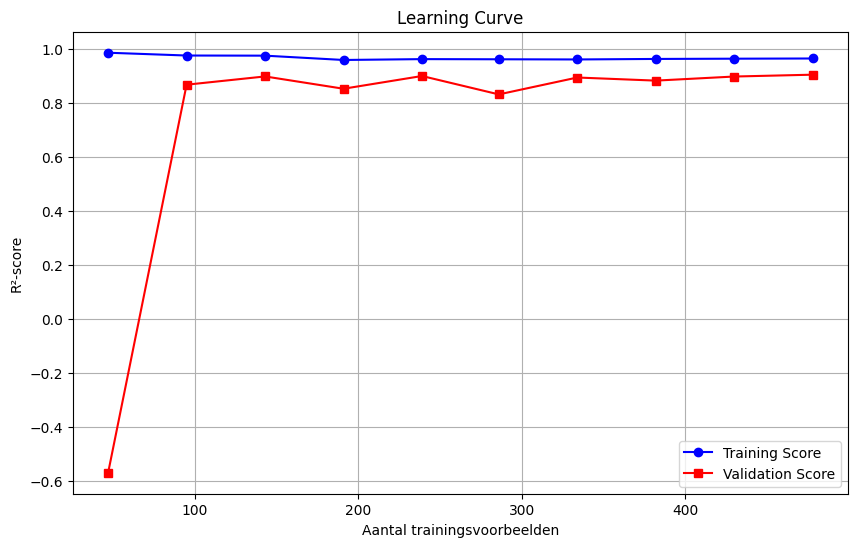

In [697]:
# Definieer de train-groottes die we willen testen
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=4, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Bereken gemiddelde en standaardafwijking van de scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot de learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')


plt.plot(train_sizes, test_mean, label="Validation Score", color="red", marker='s')


plt.xlabel("Aantal trainingsvoorbeelden")
plt.ylabel("R²-score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

## StandardScaler toepassen op de features

In [698]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline aanmaken met StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Vervangen door RobustScaler
    ('model', LinearRegression())       
])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=4, scoring='r2')  # CV score met 6 folds

# Resultaten weergeven (gemiddelde R²-score)
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven

score_scaler = round(model.score(X_test, y_test)*100,2)

print(f'Model score na het toepassen van Scaler op de features is {score_scaler}% vs {score_skew}% zonder toepassen Scaler')

# Train en test scores
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Train Score: {train_score*100:.2f}%') 
print(f'Test Score: {test_score*100:.2f}%')


Model score na het toepassen van Scaler op de features is 97.03% vs 97.03% zonder toepassen Scaler
Model score uit Cross-Validatie: 90.37%
Train Score: 95.75%
Test Score: 97.03%


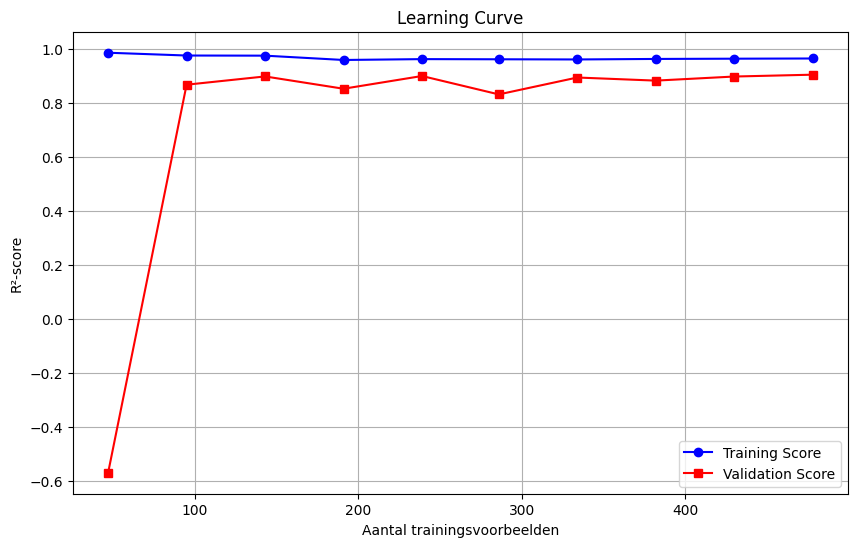

In [699]:
# Definieer de train-groottes die we willen testen
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=4, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Bereken gemiddelde en standaardafwijking van de scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot de learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')


plt.plot(train_sizes, test_mean, label="Validation Score", color="red", marker='s')


plt.xlabel("Aantal trainingsvoorbeelden")
plt.ylabel("R²-score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

### Andere Scaler gebruiken

In [700]:
from sklearn.preprocessing import RobustScaler

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline aanmaken met RobustScaler
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Vervangen door RobustScaler
    ('model', LinearRegression())       
])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=4, scoring='r2')  # CV score met 6 folds

# Resultaten weergeven (gemiddelde R²-score)
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven

score_robust = round(model.score(X_test, y_test)*100,2)

print(f'Model score na het toepassen van Scaler op de features is {score_robust}% vs {score_scaler}% zonder toepassen Scaler')

# Train en test scores
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Train Score: {train_score*100:.2f}%') 
print(f'Test Score: {test_score*100:.2f}%')


Model score na het toepassen van Scaler op de features is 97.03% vs 97.03% zonder toepassen Scaler
Model score uit Cross-Validatie: 90.37%
Train Score: 95.75%
Test Score: 97.03%


## Minder features? 

In [701]:
from sklearn.feature_selection import RFE

# Lineair model gebruiken voor RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)  # Kies hoeveel features je wilt houden
rfe.fit(X, y)

# Overgebleven belangrijke features tonen
selected_features = X.columns[rfe.support_]
print("Belangrijke features:", selected_features)

Belangrijke features: Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL', 'FUEL CONSUMPTION'], dtype='object')


In [702]:
X = auto.drop(['MAKE', 'MODEL','TRANSMISSION','VEHICLE CLASS','COEMISSIONS_boxcox'],axis=1)
y = auto['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
        ('scaler', StandardScaler()),       
        ('model', LinearRegression())       
    ])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=4, scoring='r2')  # score is het hoogst bij 6

# Resultaten weergeven (gemiddelde R²-score)
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven

score_minder_features = round(pipeline.score(X_test, y_test)*100,2)

print(f'Model score na het verwijderen van kolommen is {score_minder_features}% vs {score_scaler}% als de kolommen worden behouden')

# Train en test scores
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Train Score: {train_score*100:.2f}%') 
print(f'Test Score: {test_score*100:.2f}%')



Model score na het verwijderen van kolommen is 96.85% vs 97.03% als de kolommen worden behouden
Model score uit Cross-Validatie: 90.49%
Train Score: 95.53%
Test Score: 96.85%


### Features samenvoegen?  

In [703]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Correlatie tussen aantal cylinders en motorinhoud
correlation = auto[['CYLINDERS', 'ENGINE SIZE']].corr()

print(correlation)


# VIF berekenen 
X = auto[['CYLINDERS', 'ENGINE SIZE']]
X = sm.add_constant(X)  # Intercept toevoegen

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


auto_merge = auto.copy()
auto_merge['PowerFactor'] = auto_merge['CYLINDERS'] * auto_merge['ENGINE SIZE'] 

auto_merge.drop(columns=['CYLINDERS', 'ENGINE SIZE'], inplace=True)
auto_merge

# Variance Inflation Factor < 5 dus onwaarschijnlijk dat er een invloed is.


             CYLINDERS  ENGINE SIZE
CYLINDERS     1.000000     0.894084
ENGINE SIZE   0.894084     1.000000
       Feature        VIF
0        const  15.249123
1    CYLINDERS   4.984682
2  ENGINE SIZE   4.984682


,MAKE,MODEL,VEHICLE CLASS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS_boxcox,PowerFactor
0,0,0,0,1,3,10.5,11.183446,6.4
1,0,0,0,6,3,9.8,10.989886,6.4
2,0,1,2,4,4,13.7,11.965212,19.2
3,0,2,2,1,4,15.0,12.472733,21.0
4,0,164,9,1,3,11.4,11.419365,7.2
...,...,...,...,...,...,...,...,...
634,35,303,7,1,4,14.4,12.295009,12.0
635,35,304,7,1,4,13.6,12.096733,12.0
636,35,305,7,1,4,13.9,12.096733,11.5
637,35,305,7,6,4,13.0,11.890688,11.5


In [704]:


X = auto_merge.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto_merge['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
        ('scaler', StandardScaler()),       
        ('model', LinearRegression())       
    ])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=6, scoring='r2')  # score is het hoogst bij 6

# Resultaten weergeven (gemiddelde R²-score)
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven

score_features_samen = round(pipeline.score(X_test, y_test)*100,2)

print(f'Model score na het verwijderen van kolommen met negatieve correlatie is {score_features_samen}% vs {score_scaler}% als er geen feature enbgineering is.')

# Train en test scores
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Train Score: {train_score*100:.2f}%') 
print(f'Test Score: {test_score*100:.2f}%')





Model score na het verwijderen van kolommen met negatieve correlatie is 96.58% vs 97.03% als er geen feature enbgineering is.
Model score uit Cross-Validatie: 93.94%
Train Score: 95.58%
Test Score: 96.58%


### LASSO

In [712]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = auto.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Pipeline met Lasso-regressie (pas alpha aan voor optimalisatie)
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('feature_selection', SelectFromModel(Lasso(alpha=0.3))),  # Feature selectie met Lasso
    ('model', LinearRegression())  # Lineaire regressie als eindmodel
])

# Model trainen
pipeline.fit(X_train, y_train)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # Meer folds voor stabielere score
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven

score_lasso = round(pipeline.score(X_test, y_test)*100,2)

print(f'Model score met lasso {score_lasso}% vs {score_scaler}% zonder lasso ')

# Train en test scores
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Train Score: {train_score*100:.2f}%') 
print(f'Test Score: {test_score*100:.2f}%')



Model score met lasso 96.43% vs 97.03% zonder lasso 
Model score uit Cross-Validatie: 93.43%
Train Score: 95.20%
Test Score: 96.43%


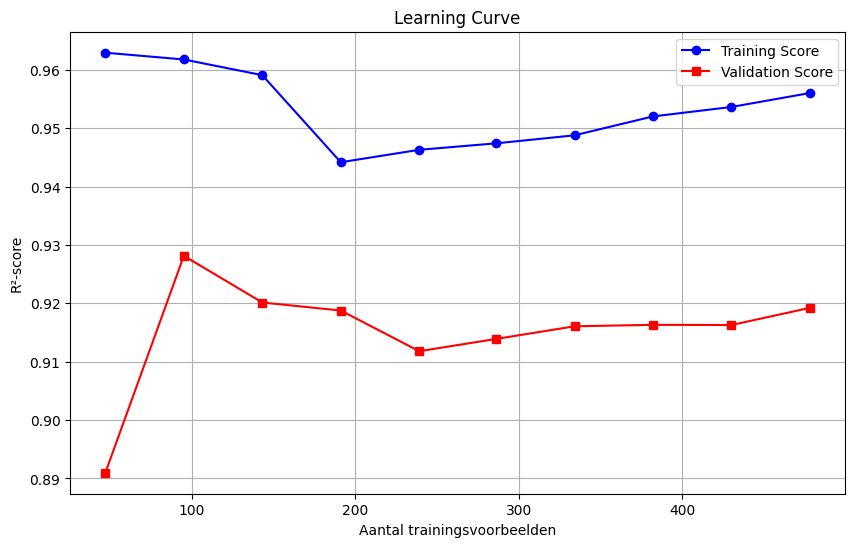

In [713]:
# Definieer de train-groottes die we willen testen
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=4, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Bereken gemiddelde en standaardafwijking van de scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot de learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')


plt.plot(train_sizes, test_mean, label="Validation Score", color="red", marker='s')


plt.xlabel("Aantal trainingsvoorbeelden")
plt.ylabel("R²-score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

### RIDGE

In [714]:
from sklearn.linear_model import Ridge

X = auto.drop(['COEMISSIONS_boxcox'], axis=1)
y = auto['COEMISSIONS_boxcox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline met StandardScaler, Ridge voor feature selectie en LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('feature_selection', SelectFromModel(Ridge(alpha=0.001))),  # Feature selectie met Ridge
    ('model', LinearRegression())  # Lineaire regressie als eindmodel
])

# Model trainen
pipeline.fit(X_train, y_train)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # 5-fold cross-validatie
gem_cv_score = np.mean(cv_scores)  # Gemiddelde R²-score

# Model score en cross-validatie scores weergeven

score_ridge = round(pipeline.score(X_test, y_test)*100,2)

print(f'Model score met ridge {score_ridge}% vs {score_scaler}% zonder ridge ')

# Train en test scores
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Train Score: {train_score*100:.2f}%') 
print(f'Test Score: {test_score*100:.2f}%')



Model score met ridge 96.43% vs 97.03% zonder ridge 
Model score uit Cross-Validatie: 93.32%
Train Score: 95.20%
Test Score: 96.43%


In [708]:
from sklearn.model_selection import GridSearchCV

param_grid = {'feature_selection__estimator__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=6, scoring='r2')
grid_search.fit(X_train, y_train)

print("Beste alpha:", grid_search.best_params_['feature_selection__estimator__alpha'])
print("Beste R²-score:", grid_search.best_score_)

Beste alpha: 0.001
Beste R²-score: 0.9529135073060685


### Verwijderen outliers

In [709]:
# Outliers bekijken

def remove_outliers(df, column='FUEL CONSUMPTION'):
    # Bereken de IQR voor de geselecteerde kolom 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Bereken de grenzen voor de outliers
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Verzamel de indices van outliers voor de 'FUEL CONSUMPTION' kolom
    outliers_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    # Maakt een nieuw dataset aan met outliers
    outliers_df = df.loc[outliers_indices].copy()

    # Verwijdert de outliers uit de dataset
    df_cleaned = df.drop(index=outliers_indices)
    
    print(f"Aantal verwijderde outliers: {len(outliers_indices)}")
    print("Outliers:")
    print(outliers_df)  # Toon de outliers in een DataFrame
    
    return df_cleaned

# Roep de functie aan voor de 'FUEL CONSUMPTION' kolom
auto_cleaned = remove_outliers(auto, column='FUEL CONSUMPTION')


print(f"Oude datasetgrootte: {auto_merge.shape[0]}")
print(f"Nieuwe datasetgrootte: {auto_cleaned.shape[0]}")





Aantal verwijderde outliers: 5
Outliers:
     MAKE  MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  TRANSMISSION  FUEL  \
211     9     10              9          5.5         12             1     4   
212     9     10              9          5.5         12             7     4   
213     9     11              9          5.5         12             1     4   
214     9     11              9          5.5         12             7     4   
215     9     17              9          5.5         12             7     4   

     FUEL CONSUMPTION  COEMISSIONS_boxcox  
211              26.7           14.779630  
212              26.3           14.615403  
213              26.7           14.779630  
214              26.3           14.615403  
215              30.2           15.371588  
Oude datasetgrootte: 638
Nieuwe datasetgrootte: 633


In [710]:
auto_cleaned

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS_boxcox
0,0,0,0,1.6,4,1,3,10.5,11.183446
1,0,0,0,1.6,4,6,3,9.8,10.989886
2,0,1,2,3.2,6,4,4,13.7,11.965212
3,0,2,2,3.5,6,1,4,15.0,12.472733
4,0,164,9,1.8,4,1,3,11.4,11.419365
...,...,...,...,...,...,...,...,...,...
634,35,303,7,2.4,5,1,4,14.4,12.295009
635,35,304,7,2.4,5,1,4,13.6,12.096733
636,35,305,7,2.3,5,1,4,13.9,12.096733
637,35,305,7,2.3,5,6,4,13.0,11.890688


In [711]:
X = auto_cleaned.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto_cleaned['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
        ('scaler', StandardScaler()),       
        ('model', LinearRegression())       
    ])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# Model score en cross-validatie scores weergeven

score_del = round(pipeline.score(X_test, y_test)*100,2)

print(f'Model score met ridge {score_del}% vs {score_num}% zonder enige manipulatie ')

# Train en test scores
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Train Score: {train_score*100:.2f}%') 
print(f'Test Score: {test_score*100:.2f}%')



Model score met ridge 97.18% vs 97.56% zonder enige manipulatie 
Model score uit Cross-Validatie: 93.32%
Train Score: 95.87%
Test Score: 97.18%
